# Python Lab 2: Clustering

## José David Beltrán

In [35]:
# Import some pacakges
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Importing a Data Set with a DataFrame

Pandas introduces a Python object known as a DataFrame which is well equipped for organizing large data sets. To illustrate this, we return to the example of the iris data set.

In [52]:
import urllib.request 
urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat", "airfoil.csv")

('airfoil.csv', <http.client.HTTPMessage at 0x7f33a4607c70>)

In [53]:
# This code imports a data set from a .csv file (in the same directory as this notebook) and stores it in a DataFrame.
df_mydata = pd.read_csv('airfoil.csv', header=None, delimiter="\t")

# View the type
type(df_mydata)
df_mydata.shape

(1503, 6)

In [54]:
# Specify the column names that you want to use as features in this model.
headers =  ["Frequency (Hz)","Angle of attack (Degrees)","Chord length (m)","Free-stream velocity (m/s)","Suction side displacement thickness (m)", "Scaled sound pressure level (decibels)"]
df_mydata.columns = headers

In [55]:
# If your data set is large, this the "head()" function let's you view the first few entries to see what's inside.
df_mydata.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [56]:
df_mydata['Noise threat level'] = df_mydata.iloc[:,5]

In [57]:
df_mydata.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Noise threat level
0,800,0.0,0.3048,71.3,0.002663,126.201,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461,127.461


We normalize the data set.

In [58]:
from sklearn import preprocessing
x = df_mydata.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
headers2 =  ["Frequency (Hz)","Angle of attack (Degrees)","Chord length (m)","Free-stream velocity (m/s)","Suction side displacement thickness (m)", "Scaled sound pressure level (decibels)","Noise threat level"]
df.columns = headers2

In [59]:
df.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Noise threat level
0,0.030303,0.0,1.0,1.0,0.039005,0.606829,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333,0.640333


In [60]:
def Category(x):
    if x > 0.8  :
        return "Bad"
    elif x> 0.6 and x<0.8 :
        return "Not too bad"
    else:
        return"Good"

In [61]:
df['Noise threat level'] = df['Noise threat level'].map(Category)

In [62]:
df.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Noise threat level
0,0.030303,0.0,1.0,1.0,0.039005,0.606829,Not too bad
1,0.040404,0.0,1.0,1.0,0.039005,0.580238,Good
2,0.053030,0.0,1.0,1.0,0.039005,0.600181,Not too bad
3,0.070707,0.0,1.0,1.0,0.039005,0.643790,Not too bad
4,0.090909,0.0,1.0,1.0,0.039005,0.640333,Not too bad


We can make the following summary concerning the Airfoil Self-Noise data set
- The data set consists of a table with 6 columns and 1503 rows.
- There are five features (Frequency, Angle of attack, Chord length, Free-stream velocity, Suction side displacement thickness) and one label: "Scaled sound pressure level (decibels)" .
- Each feature consists of numerical measurements.

We can visualize each pair of coordinates using pair plots.  For $i\not=j$ The plot in the ith row and jth column corresponds to a plot of the ith variable versus the jth variable. Along the diagonal, we see the distribution of the ith variable partitioned into the 3 threat groups. 

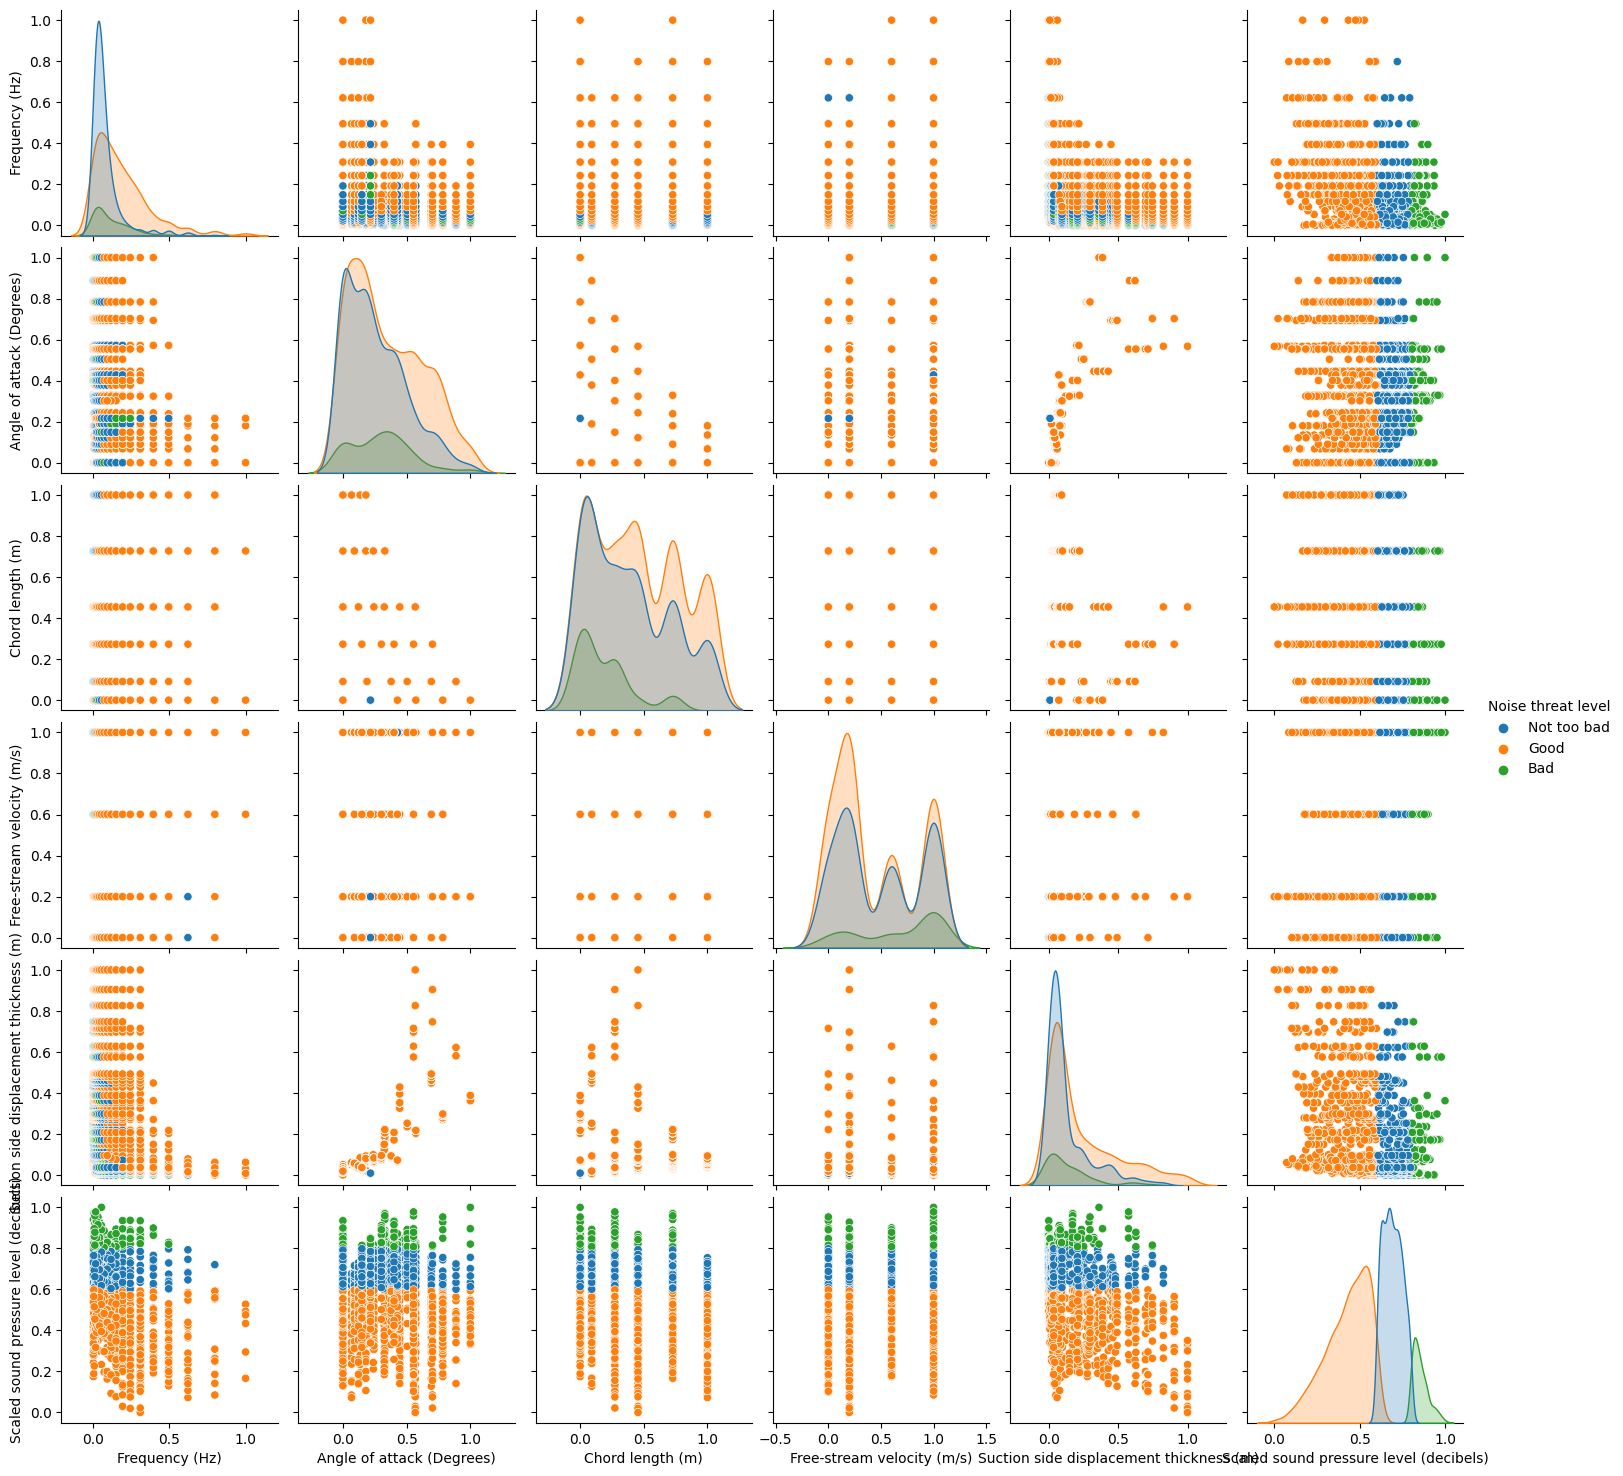

In [63]:
# Visually examine how the features compare between the species.
#
sns.pairplot(df, hue='Noise threat level');

## Part 2: k-means Clustering

We first remove the categorical column, keeping only the numerical columns:

In [64]:
df_mydataNumerical = df.select_dtypes(include=np.number)
df_mydataNumerical.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels)
0,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333


Per https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300)) <br>
choses the default <b>inputs</b> 
 <ul><li> the first input:   n_clusters = number of clusters = 8 <br>
 <li> the second input:   init = initialization method = k-means++ <br>
 <li> the third input:  n-init = Number of times the k-means algorithm is run with different centroid seeds. 
</ul>
Below, we change  
 <ul>
<li>  the default number of clusters from n_clusters=8  to 3 clusters <br>
<li>  the initialization method to random, where 3 random data points are chosen as  <br>
                                     the initial centroids of voronoi regions, and
<li>  n-init = 10, so clustering algorithm is run 10 times with different initial centroids each time,  the best of the 10 clustering outputs is chosen among the 10 clustering results, while the other 9 are discarded.
 </ul>            
The <b>outputs</b> or attributes includes the  
<ul>
<li>  cluster_centers_ = Coordinates of cluster centers (or centroids).  <br>
<li>  labels_ndarray of shape (n_samples,) = Labels of each point
</ul>

In [65]:
from sklearn.cluster import KMeans


# Specify the value of K, initialization method, and number of times KMeans is run.
km = KMeans(3, init = 'random', n_init = 10)

# Fit the model to your data set (in other words, apply km to your data.
km.fit(df_mydataNumerical)

# This extracts the coordinates corresponding to the clusters' centers.
centers = km.cluster_centers_
# This extracts the cluster labels.
label = km.labels_


We will now use pairplot to visualize the clusters using the cluster labels as colors.

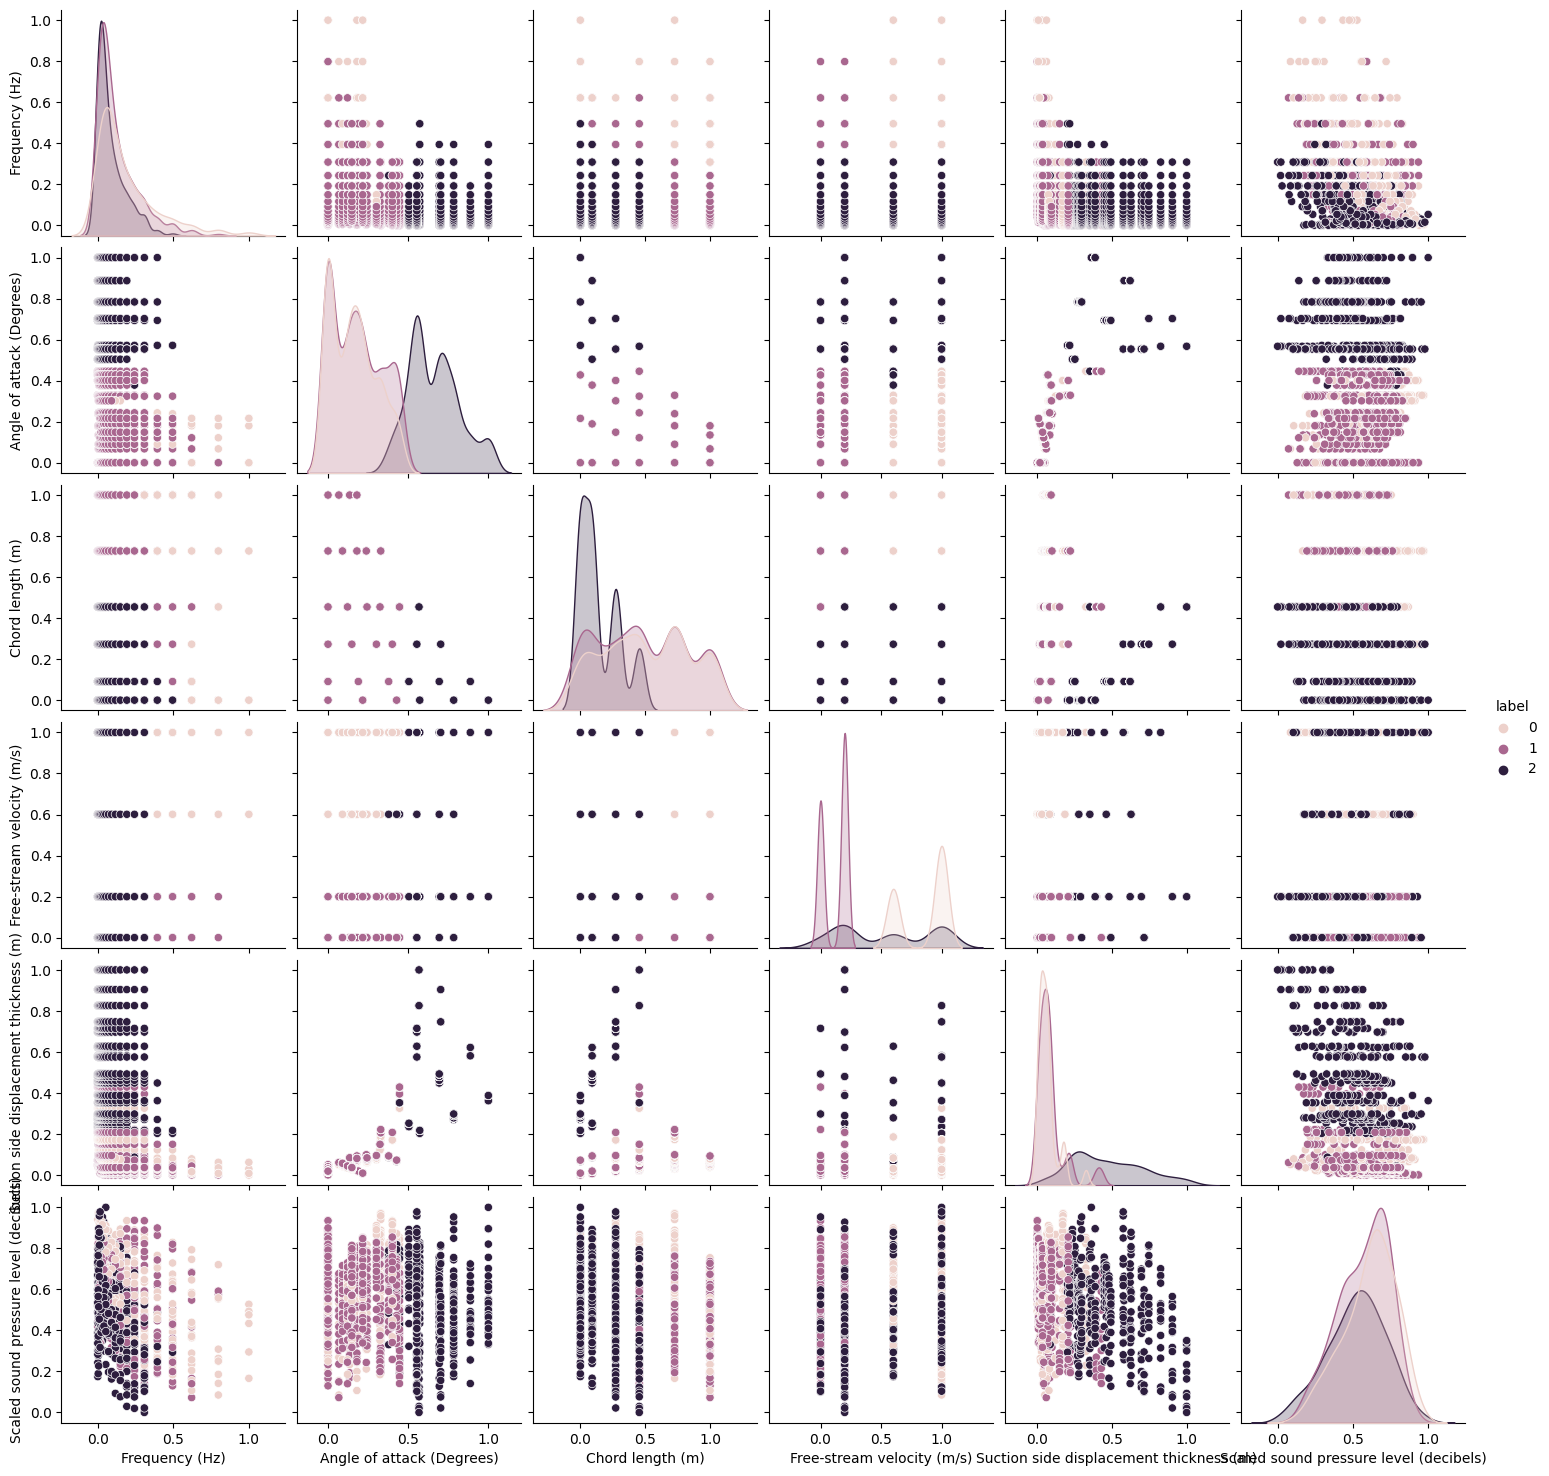

In [66]:
# Add column to df_mydataNumerical containing cluster labels.
df_mydataNumerical['label'] = label
# use these cluster labels to color the data points
sns.pairplot(df_mydataNumerical, hue='label');

In [67]:
df_mydataNumerical.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),label
0,0.030303,0.0,1.0,1.0,0.039005,0.606829,0
1,0.040404,0.0,1.0,1.0,0.039005,0.580238,0
2,0.053030,0.0,1.0,1.0,0.039005,0.600181,0
3,0.070707,0.0,1.0,1.0,0.039005,0.643790,0
4,0.090909,0.0,1.0,1.0,0.039005,0.640333,0


We can also view the data projected onto 2 coordinates using PCA.  Note since I added the cluster label column, I need to delete this column before I apply PCA.  

In [68]:
from sklearn.decomposition import PCA
# We will project onto 2 coordinates
pca = PCA(2)

# I rename my dataset df (for dataframe) after dropping the cluster 'label' columns.    
df = df_mydataNumerical.drop(columns=['label'])
#Transform the data using PCA
df = pca.fit_transform(df)

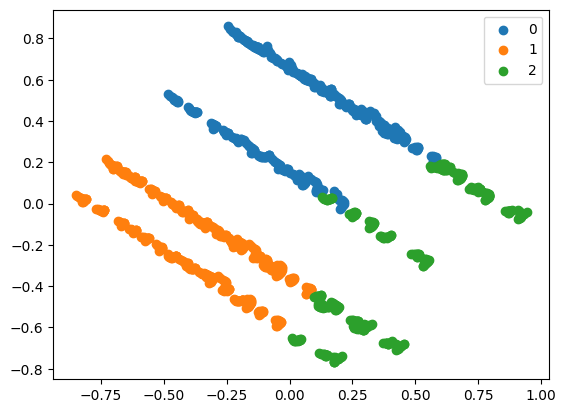

In [69]:
# We will now plot the PCA projection, coloring the data points using the cluster labels.

# Getting unique labels
u_labels = np.unique(label)
 
# plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

We will now illustrate the elbow method for choosing k

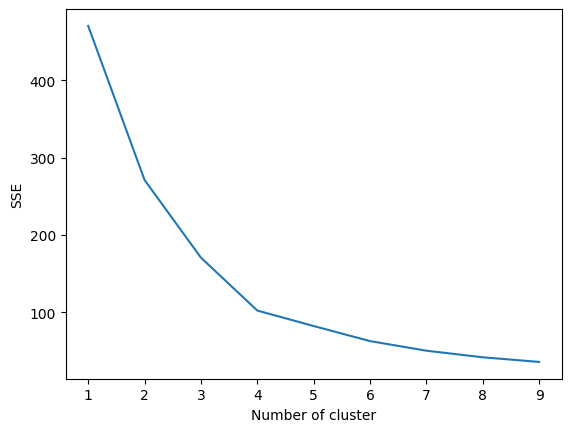

In [70]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init = 'random', n_init = 10).fit(df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Part 3 Hierarchical clustering

We will illustrate with a simple 1-dimensional example how hierarchical clustering is affected by noixe.

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage

x = np.array([2.5, 4, 4.95, 6, 8])
x


array([2.5 , 4.  , 4.95, 6.  , 8.  ])

The 1-dimensional array x will be treated as a condensed distance matrix and thus must be re-shaped.  Normally your data will contain more than 1 variable and thus you won't need to reshape your data.

In [72]:

x = np.reshape(x, (len(x), 1))
x

array([[2.5 ],
       [4.  ],
       [4.95],
       [6.  ],
       [8.  ]])

We will now compute and draw the dendrogram

/home/jdbeltranlizarazo/.local/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


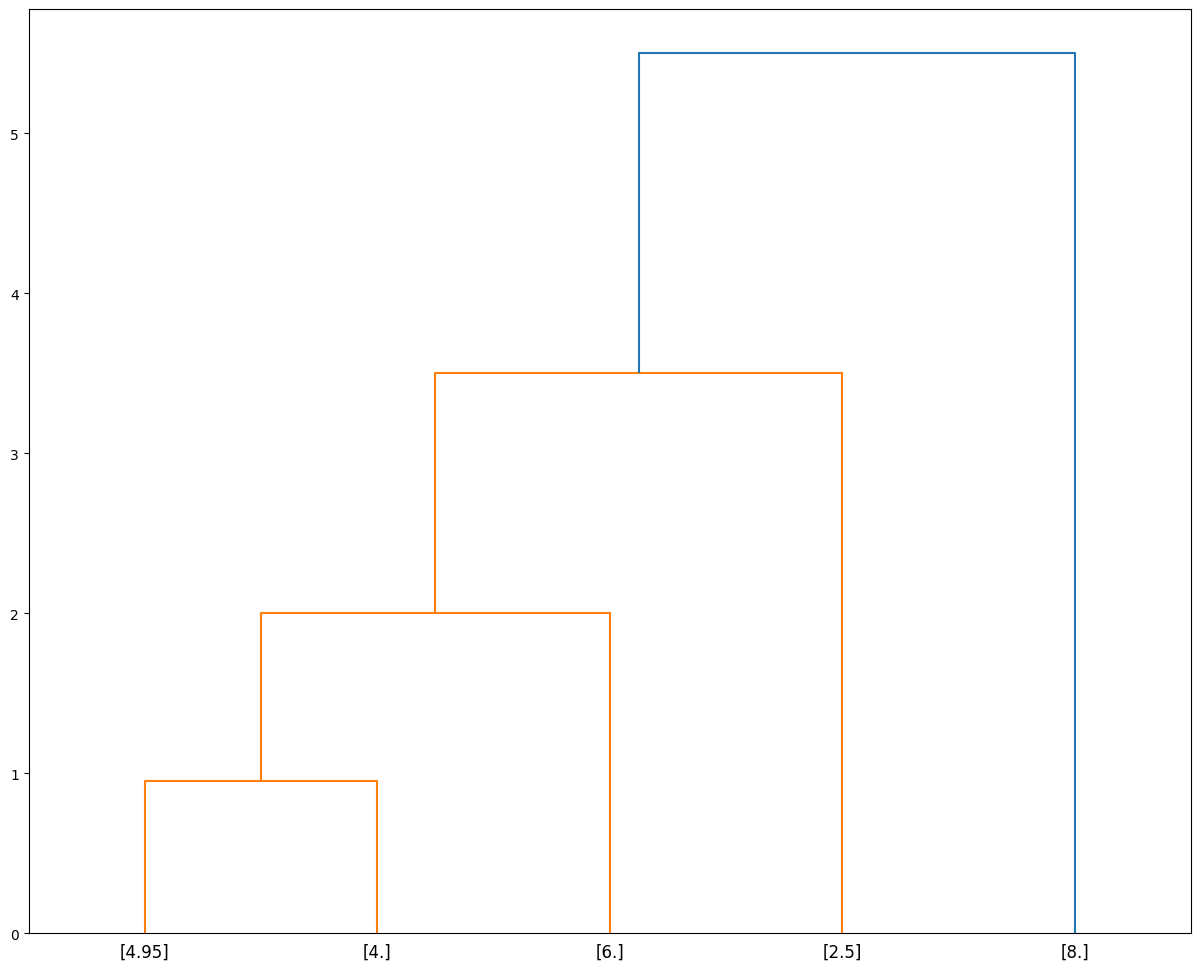

In [73]:
linked = linkage(x, 'complete')

labelList = x

plt.figure(figsize=(15, 12))
temp = dendrogram(
            linked,
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

We will now perturb the data set, changing 4.95 to 5.05

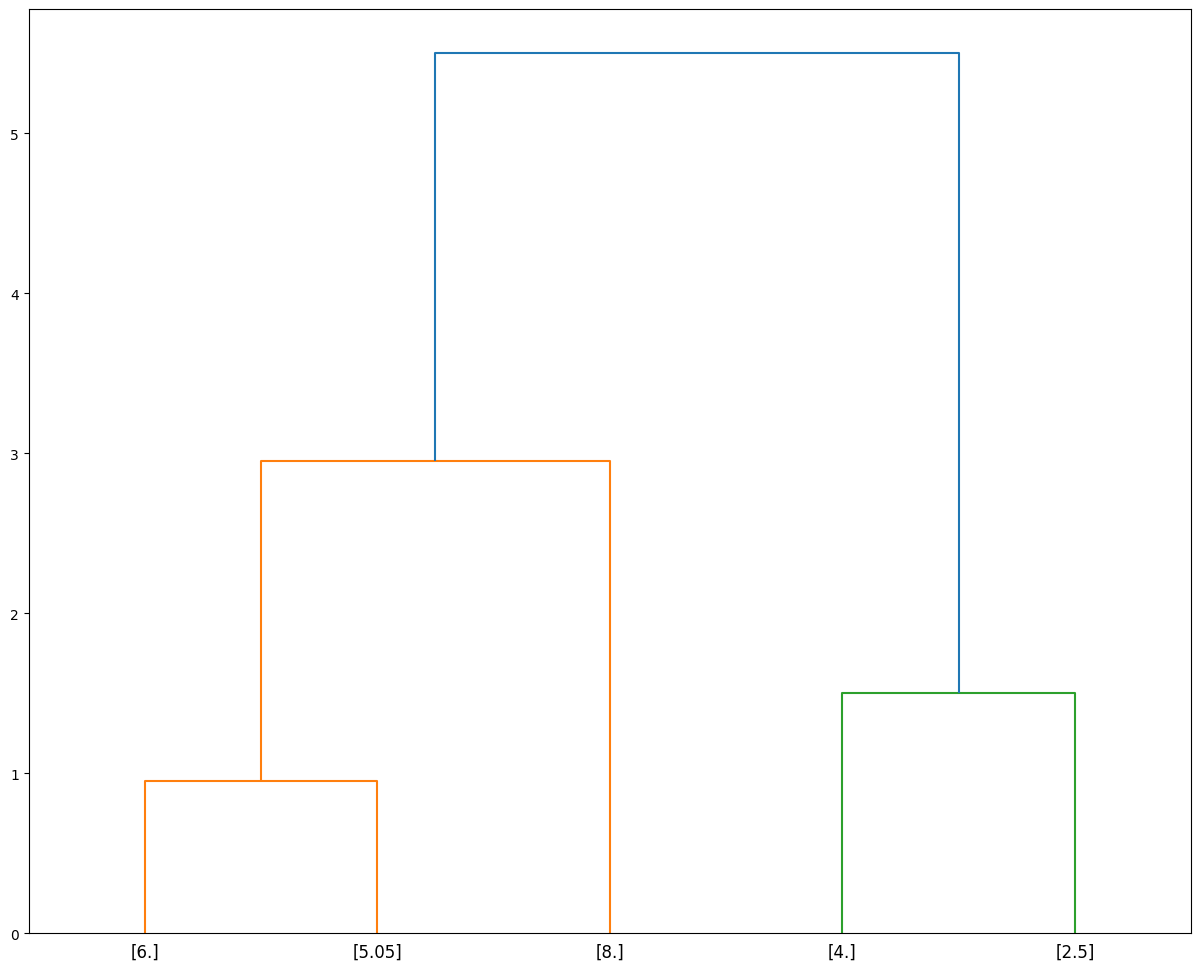

In [74]:
x = np.array([2.5, 4, 5.05, 6, 8])
x = np.reshape(x, (len(x), 1))
linked = linkage(x, 'complete')

labelList = x

plt.figure(figsize=(15, 12))
temp = dendrogram(
            linked,
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

Note the significant change in the dendrogram.  In the above example, we used complete linkage.  What do you get if you use single linkage or ward's linkage?

We can also create a dendrogram for the iris data set (which is currently named df) -- in practice, you should not change the name of the dataset.

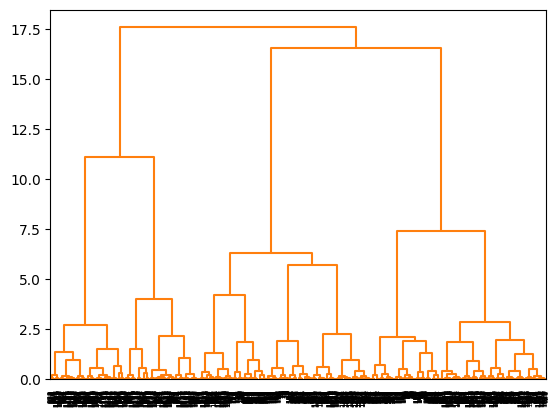

In [75]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
temp = hierarchy.linkage(df, 'ward')
plt.figure()
dn = hierarchy.dendrogram(temp, above_threshold_color="green", color_threshold=40000)


## Part 4 DBscan clustering

Use DBscan to cluster your data and plot the clusters.  Briefly explain why you might not want to use DBscan.

In [77]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [78]:
db = DBSCAN(eps=0.3, min_samples=10).fit(df)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 0


In [79]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

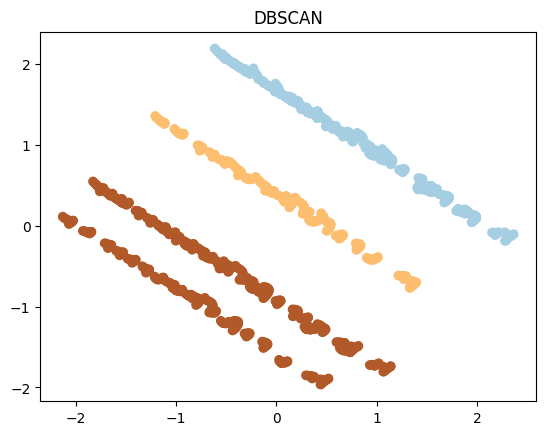

In [82]:
dbscan(df, 0.4, 10)

The use of DBSCAN may be useful to categorize our data into groups corresponding to different features. Our initial thought was to organize data according to a potenial "noise threat level", but we have to be careful with the criteria we use to determine whether certain noise level will be harmful or not, studying carefully the different data groups in this specific case.